In [1]:
import deeplay as dl
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

c:\Users\GU\AppData\Local\Programs\Python\Python310\lib\site-packages\torchaudio\backend\utils.py:62: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")


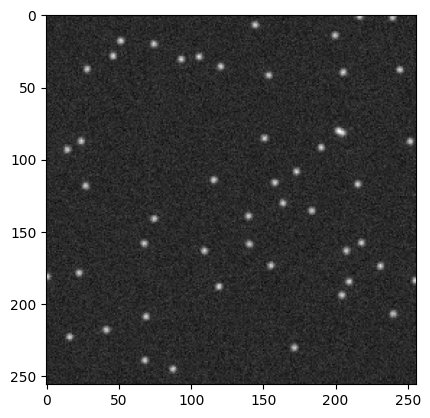

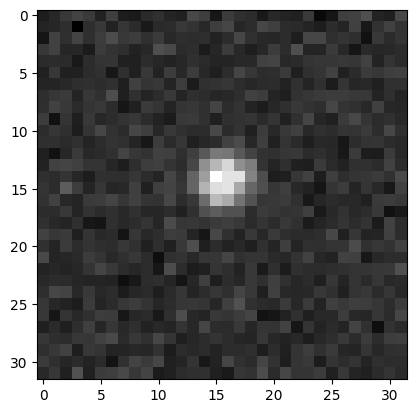

In [2]:
data = np.load("data.npy")
data = (data - np.min(data)) / np.ptp(data)

plt.imshow(data[0], cmap="gray")
plt.show()

crop = data[0, 100:132, 100:132]
plt.imshow(crop, cmap="gray")

In [3]:
import torch
data = [torch.from_numpy(crop).float().permute(2, 0, 1)] * 50
dataloader = torch.utils.data.DataLoader(data * 2, batch_size=1, shuffle=True)

In [4]:
data = next(iter(dataloader))

In [15]:
lodestar = dl.LodeSTAR(n_transforms=8, optimizer=dl.Adam(lr=1e-3), within_loss_weight=0.01).build()
lodestar

LodeSTAR(
  (model): ConvolutionalNeuralNetwork(
    (blocks): LayerList(
      (0): PoolLayerActivationNormalization(
        (pool): Identity()
        (layer): LazyConv2d(0, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (activation): ReLU()
        (normalization): Identity()
      )
      (1): PoolLayerActivationNormalization(
        (pool): Identity()
        (layer): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (activation): ReLU()
        (normalization): Identity()
      )
      (2): PoolLayerActivationNormalization(
        (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (layer): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (activation): ReLU()
        (normalization): Identity()
      )
      (3): PoolLayerActivationNormalization(
        (pool): Identity()
        (layer): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (activation)

In [16]:
trainer = dl.Trainer(max_steps=2500)
trainer.fit(lodestar, dataloader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type                       | Params
-------------------------------------------------------------
0 | model         | ConvolutionalNeuralNetwork | 251 K 
1 | between_loss  | L1Loss                     | 0     
2 | within_loss   | L1Loss                     | 0     
3 | train_metrics | MetricCollection           | 0     
4 | val_metrics   | MetricCollection           | 0     
5 | test_metrics  | MetricCollection           | 0     
6 | optimizer     | Adam                       | 0     
-------------------------------------------------------------
251 K     Trainable params
0         Non-trainable params
251 K     Total params
1.004     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=2500` reached.


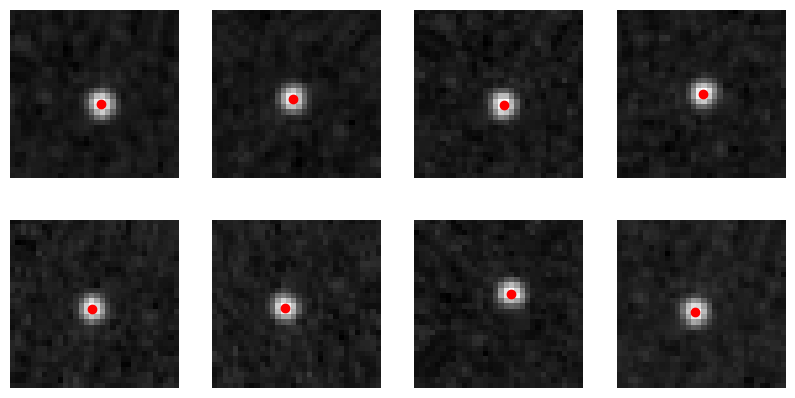

In [17]:

transformed, _ = lodestar.train_preprocess(data)
pooled = lodestar.pooled(transformed).squeeze().detach().numpy()
plt.figure(figsize=(10, 5))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(transformed[i].detach().permute(1, 2, 0).numpy(), cmap="gray")
    plt.scatter(pooled[i, 1], pooled[i, 0], c="r")
    plt.axis("off")

plt.show()


In [8]:
# lodestar.eval()
# pred1 = lodestar.pooled(data).detach().numpy()
# lodestar.train()
# pred2 = lodestar.pooled(data).detach().numpy()

# print(np.allclose(pred1, pred2))

False


In [9]:
lodestar.training

True